Quantidade de Vivos:  155844
Quantidade de Mortos:  16801


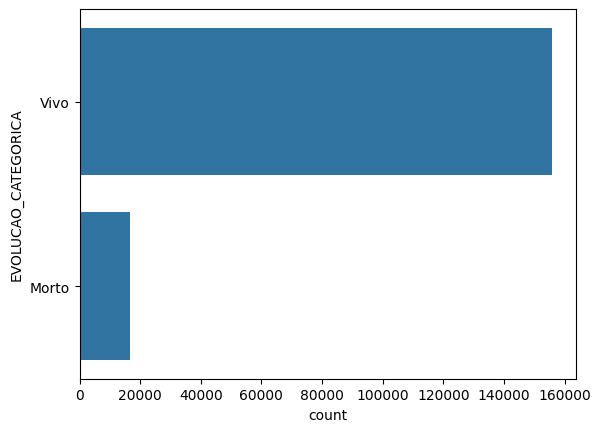

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
import sklearn.metrics

path = (r"C:\Users\gabri\Downloads\TCC\Projeto\sinresp.csv")
df = pd.read_csv(path, on_bad_lines='skip', sep=';', low_memory=False)

limite = len(df) * 0.5
df = df.dropna(thresh=limite, axis=1)
df = df.dropna(subset=['EVOLUCAO'])

colunas_apagadas = ['SG_UF_NOT', 'ID_REGIONA', 'ID_MUNICIP', 'ID_UNIDADE', 'ID_PAIS', 'SG_UF', 'ID_RG_RESI', 'ID_MN_RESI']
df = df.drop(columns = colunas_apagadas)

Y = df.EVOLUCAO
df['EVOLUCAO_CATEGORICA'] = df['EVOLUCAO'].map({1.0: 'Vivo', 2.0: 'Morto'})

ax = sns.countplot(df['EVOLUCAO_CATEGORICA'], label="Quantidade")
V, M = df['EVOLUCAO_CATEGORICA'].value_counts()
print('Quantidade de Vivos: ', V)
print('Quantidade de Mortos: ', M)

plt.show()